In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(23)
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Use pd.concat() instead of append()
df = pd.concat([df, df1], ignore_index=True)
df = df.sample(40)


In [ ]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
                    color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
# step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [ ]:
# step2 - find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Cov Matrix :\n',covariance_matrix)

Cov Matrix :
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [ ]:
# step 3 - Finding EV and EV's
eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)

In [ ]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [ ]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [ ]:
# %pylab inline

# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import proj3d
# from matplotlib.patches import FancyArrowPatch


# class Arrow3D(FancyArrowPatch):
#     def __init__(self, xs, ys, zs, *args, **kwargs):
#         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
#         self._verts3d = xs, ys, zs

#     def draw(self, renderer):
#         xs3d, ys3d, zs3d = self._verts3d
#         xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
#         self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
#         FancyArrowPatch.draw(self, renderer)

# fig = plt.figure(figsize=(7,7))
# ax = fig.add_subplot(111, projection='3d')

# ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
# ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
# for v in eigen_vectors.T:
#     a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
#     ax.add_artist(a)
# ax.set_xlabel('x_values')
# ax.set_ylabel('y_values')
# ax.set_zlabel('z_values')

# plt.title('Eigenvectors')
# plt.show()


Populating the interactive namespace from numpy and matplotlib


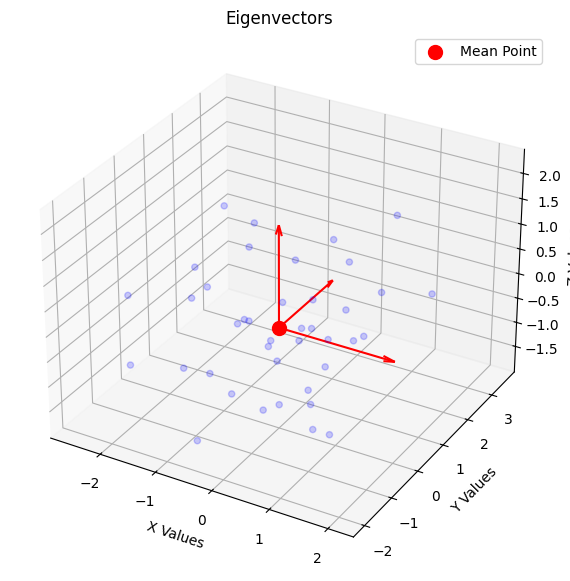

In [ ]:
%pylab inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example eigenvectors (replace with your actual ones)
eigen_vectors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], c='blue', alpha=0.2)

# Plot the mean point
mean_point = [df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()]
ax.scatter(*mean_point, color='red', s=100, label="Mean Point")

# Add eigenvector arrows
for v in eigen_vectors:
    ax.quiver(
        mean_point[0], mean_point[1], mean_point[2],  # Origin
        v[0], v[1], v[2],  # Direction
        length=2, normalize=True, color='r', arrow_length_ratio=0.1
    )

ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
ax.set_zlabel('Z Values')
plt.title('Eigenvectors')
plt.legend()
plt.show()


In [ ]:
pc = eigen_vectors[0:2]
pc

array([[1, 0, 0],
       [0, 1, 0]])

In [ ]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.700809,-1.525586,1
1,-0.224481,-1.010757,0
2,-0.011456,-0.046935,1
3,1.342296,-0.962723,1
4,-2.571350,-0.299561,1


In [ ]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()